In [1]:
%matplotlib qt4
import hyperspy.api as hs
import hyperspy_tools.plotting as htp
import hyperspy_tools.shifting_lines as hts

# Set some display preferences:
import seaborn as sns
sns.set_style('white',
              rc={"image.cmap": 'cubehelix',
                  'legend.frameon': False,
                  "lines.linewidth": 1})
sns.set_context('poster', font_scale=1.2)

import matplotlib.pyplot as plt


Logging is active
The log is stored in the hyperspy_log.py file in the current directory


## Plotting survey:

In [17]:
htp.plot_dm3_survey_with_markers('survey_image.dm3')

<Image, title: EELS_SI_1-C_K-survey, dimensions: (|512, 512)>

In [18]:
plt.gca().set_title('EELS Survey Image')

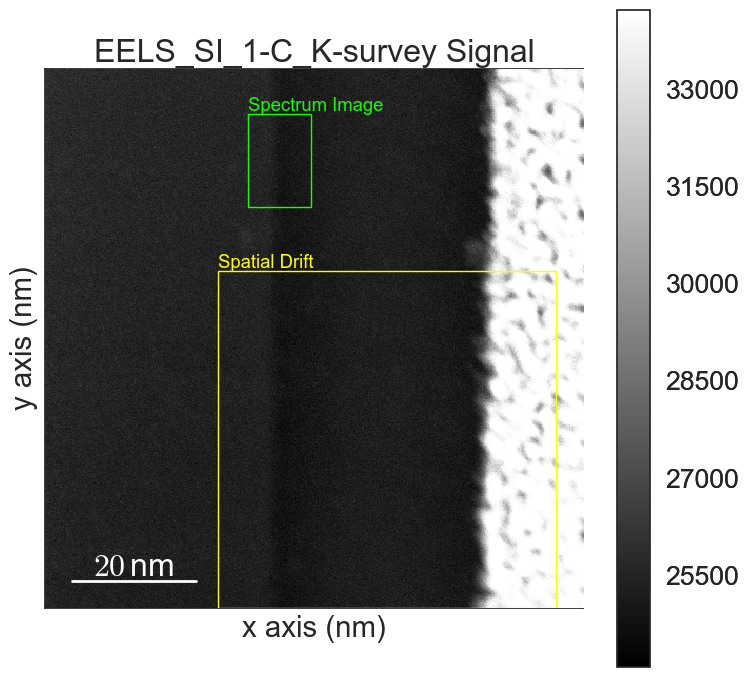

In [15]:
plt.gcf()

## Adding custom color outlines:

In [2]:
eels_sig = hs.load('EELS_signal.hdf5')

In [59]:
# This spectrum already had a decomposition performed...
loadings = eels_sig.get_decomposition_loadings()

In [77]:
hs.plot.plot_images(loadings,
                    axes_decor=None, 
                    per_row=3,
                    label=['Loading {}'.format(i) for i in range(3)],
                    colorbar=None)

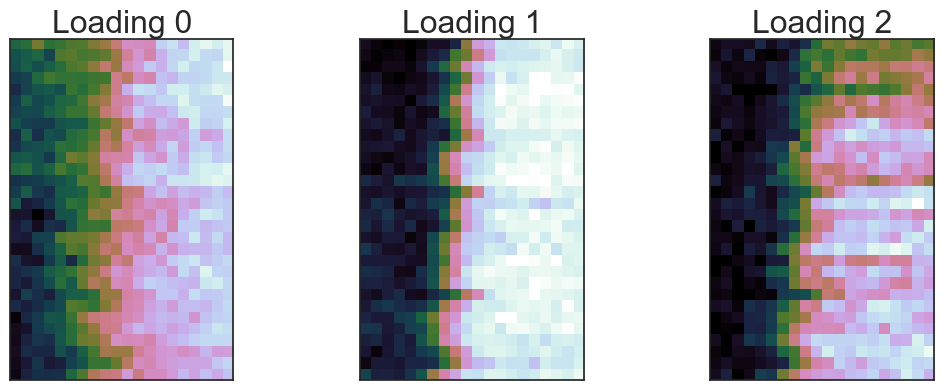

In [78]:
plt.gcf()

In [79]:
htp.add_colored_outlines(fig=plt.gcf(),
                         signal=eels_sig,
                         num_images=3,
                         border=0,
                         lw=15)

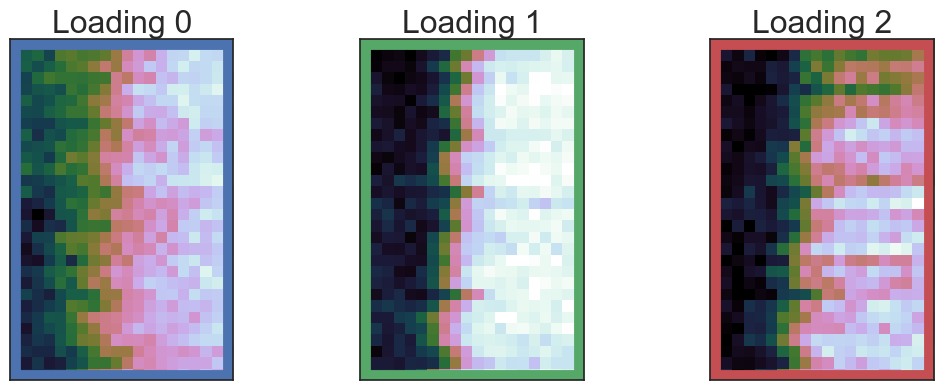

In [80]:
plt.gcf()

In [81]:
# Little helper function to calculate middle easily
def avg_list(i, j):
    return [i, (i + j)/2, j]

# add the colorbars
htp.add_custom_colorbars(fig=plt.gcf(),
                         tick_list=[avg_list(16, 28),
                                    avg_list(-21, 0),
                                    avg_list(0, 12)])

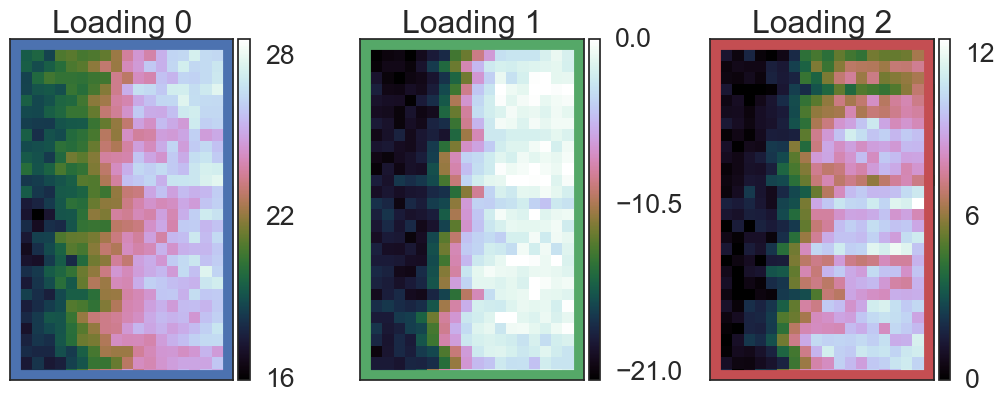

In [82]:
plt.gcf()

## Correcting spatial drift:

In [3]:
stem = hs.load('STEM_signal.dm3')
eels = hs.load('EELS_signal.hdf5')

In [ ]:
stem_linescans, shifts = hts.get_shifts_from_area_stem(stem, debug=True)

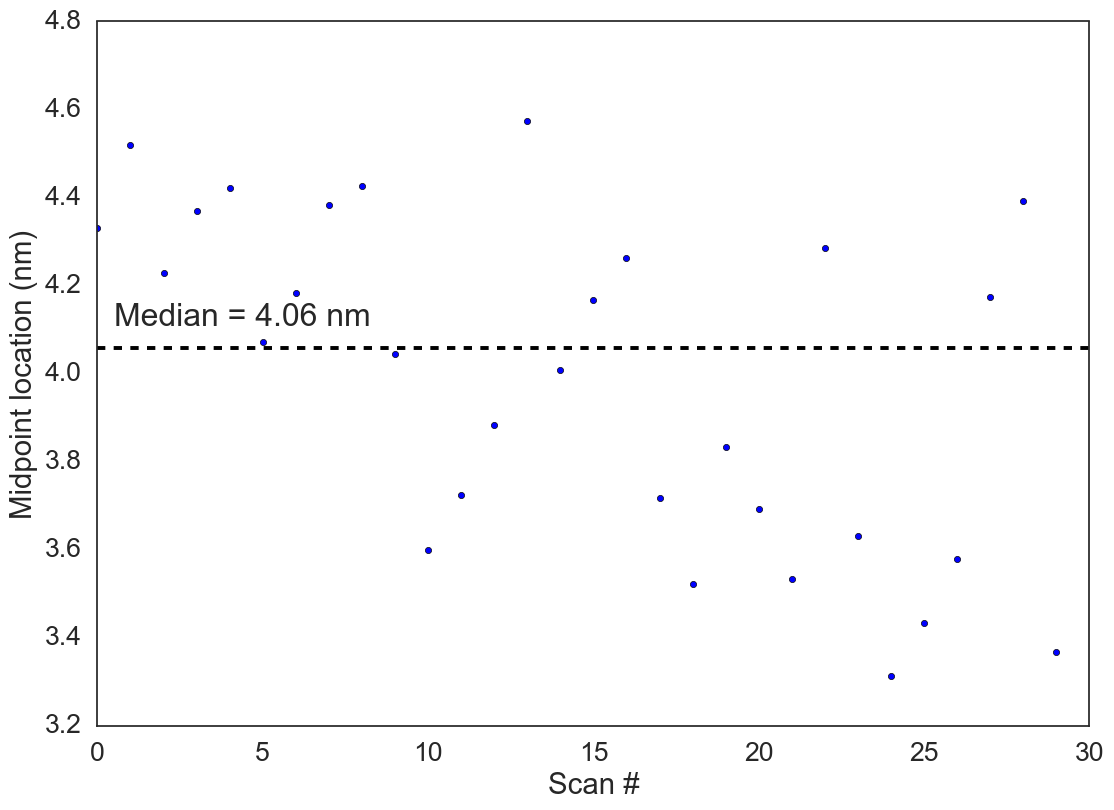

In [86]:
plt.gcf()

In [5]:
shifts

array([-0.2715, -0.4605, -0.1705, -0.3105, -0.3635, -0.0135, -0.1235,
       -0.3245, -0.3675,  0.0135,  0.4585,  0.3345,  0.1745, -0.5165,
        0.0515, -0.1095, -0.2035,  0.3415,  0.5375,  0.2265,  0.3655,
        0.5255, -0.2275,  0.4275,  0.7455,  0.6245,  0.4805, -0.1155,
       -0.3335,  0.6915])

In [6]:
shifted_stem = hts.shift_area_stem(stem, shifts=shifts)

In [96]:
hs.plot.plot_images([stem, shifted_stem],
                     suptitle='Shifting STEM images',
                     colorbar=None,
                     label=['Original', 'Shifted'],
                     axes_decor=None,
                     scalebar='all')

In [9]:
# Do not crop scan so we can see shifted lines:
shifted_eels = hts.shift_area_eels(eels, shifts=shifts, crop_scan=False)

In [11]:
# Plotting as images (rather than Spectra) makes it easier to see the shift
hs.plot.plot_signals([eels.as_image((0,1)), 
                      shifted_eels.as_image((0,1))])